In [13]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from matplotlib.colors import ListedColormap
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump

%matplotlib inline

In [14]:
##读取数据
Database=pd.read_csv("Database202353.csv",index_col=None)
X=Database.iloc[:,:-1]
rt=Database.iloc[:,-1]

In [15]:
#用get_dummies方法对名称字段进行onehot编码
X=pd.DataFrame(X)
X_needencoder=X.iloc[:,:7]
X_needencoder_dummy=pd.get_dummies(X_needencoder,columns=X_needencoder.columns)
X.drop(['核苷种类','A溶剂','A添加剂种类mmol','A添加剂种类percent','B溶剂',
        'B添加剂种类mmol','B添加剂种类percent'],axis=1,inplace=True)
X_needencoder_dummy.to_csv('X_needencoder_dummy.csv',index=False,encoding='utf-8-sig')

In [19]:
from sklearn.preprocessing import StandardScaler
# 特征缩放
scaler = StandardScaler()
X_num = X.select_dtypes(include=['int','float64'])  # 选取连续的数值变量
X_num_scaled = scaler.fit_transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns)
X=pd.concat([X_num_scaled,X_needencoder_dummy],axis=1)
X.to_excel('X.xlsx',index=False,encoding='utf-8-sig')

d:\Anaconda1\envs\env_name\lib\site-packages\pandas\util\_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


In [17]:
# 将数据集拆分为训练集、验证集、测试集
X_train, X_test, Y_train, Y_test = train_test_split(X, rt, test_size=0.2, random_state=0)

最优超参数： {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 150, 'reg_alpha': 0, 'reg_lambda': 0.1}
[22:36:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:35] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in f

d:\Anaconda1\envs\env_name\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Anaconda1\envs\env_name\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Anaconda1\envs\env_name\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "d:\Anaconda1\envs\env_name\lib\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
  File "d:\Anaconda1\envs\env_name\lib\site-packages\xgboost\core.py"

[22:36:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
最优参数： {'eta': 0.5, 'objective': 'reg:linear'}
[22:36:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
模型性能： 0.7532365224450343
[22:36:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:36:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[22:3

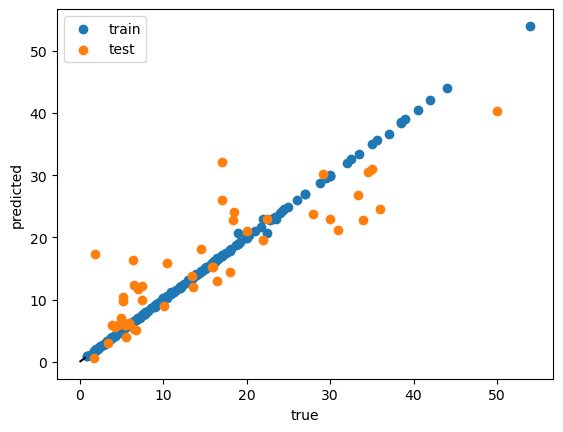

In [18]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 定义参数范围
params = {
    'max_depth': np.arange(3, 10, 2),
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 150],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5],
}

# 使用GridSearchCV进行超参数调整
xgb_model = xgb.XGBRegressor(random_state=42)
grid_search = GridSearchCV(xgb_model, param_grid=params, 
                           scoring='neg_mean_squared_error', cv=kf)
grid_search.fit(X, rt)
# 输出最优参数
print('最优超参数：', grid_search.best_params_)

##逻辑回归的目标函数
dtrain = xgb.DMatrix(X_train, label=Y_train)
target_params = {'objective': ['reg:linear', 'reg:logistic', 'binary:logistic'], 
          'eta': [0.01, 0.1, 0.5]}
xgb_model = xgb.XGBRegressor(random_state=42)
grid_search_target = GridSearchCV(xgb_model, param_grid=target_params, 
                           scoring='neg_mean_squared_error', cv=kf)
grid_search_target.fit(X, rt)

# 输出最优参数
print('最优参数：', grid_search_target.best_params_)
##model = xgb.train(params, dtrain, num_boost_round=100)

# 训练模型
model = xgb.XGBRegressor(**grid_search.best_params_,
                         **grid_search_target.best_params_, random_state=42)
model.fit(X_train, Y_train)

test_score = model.score(X_test, Y_test)
score=model.score(X_test,Y_test)
print('模型性能：',score)

##交叉验证
scores = cross_val_score(model, X, rt, cv=kf, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print('均方根误差：', rmse_scores.mean())



dump(model, 'XGBoost_model.joblib')

# 绘制回归曲线
model.fit(X_train, Y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
plt.scatter(Y_train, y_pred_train, label='train')
plt.scatter(Y_test, y_pred_test, label='test')
plt.plot([0, 1], [0, 1], '--', color='black')
plt.xlabel('true')
plt.ylabel('predicted')
plt.legend()
plt.show()